In [1]:
import jagular as jag
import os
import numpy as np

# change as needed
files = ['/home/kaylavokt/Desktop/Whrath/test20220214_163334.rec']

# generate the jagular file map
jfm = jag.io.JagularFileMap(files)

ch_per_elec = 4
tt = 0

##########################################################################
# extraction parameters
max_gap_size = 10000 # maximum number of samples to interpolate
ts_out = os.path.splitext(files[0])[0] + '-timestamps.raw' # output file, customize as needed
ch_out_prefix = os.path.splitext(files[0])[0] + '.' # customize as needed

start_ch = tt*ch_per_elec
end_ch = start_ch + ch_per_elec
subset = list(np.arange(start_ch, end_ch)) # which channels to extract. here these are the channels from tetrode #2
block_size = 2**21 # controls how much data to read at a time
verbose = False # whether to print extra stuff. right now it's not terribly informative
###########################################################################

jag.utils.extract_channels(
    jfm=jfm,
    max_gap_size=max_gap_size,
    ts_out=ts_out,
    ch_out_prefix=ch_out_prefix,
#     subset=subset,
    block_size=block_size,
    verbose=True
)

ModuleNotFoundError: No module named 'jagular'

In [7]:
jfm

<JagularFileMap[SpikeGadgetsRecFileReader]: 1 file spanning 2:55:648 minutes> at 0x7f11a013d048

In [6]:
timestamps = np.fromfile(
    '/home/kaylavokt/Desktop/wrath_2_14_22_2/test20220214_163334-timestamps.raw',
    dtype=np.uint32)

In [8]:
desired_tt = 1
ch = 0
desired_ch = desired_tt*ch_per_elec + ch

data = np.fromfile(
    f'/home/kaylavokt/Desktop/wrath_2_14_22_2/test20220214_163334.ch.{desired_ch:02}.raw',
    dtype=np.int16)
assert len(timestamps) == len(data)

In [22]:
import matplotlib.pyplot as plt

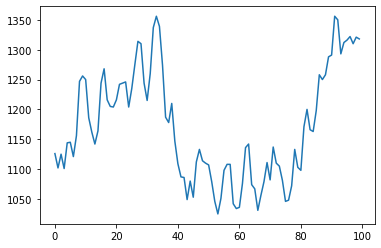

In [24]:
plt.plot(data[100:200])